# Airline arrive:

In [1]:
#data structure + handling data:
import pandas as pd
import numpy as np

#visualization:
from matplotlib import pyplot as plt
import seaborn as sns
from xgboost import plot_importance

#preprocessing:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#features selection:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

#models:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

#metrics:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc

#tuning models:
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Read data:

In [2]:
original_data = pd.read_csv('2008.csv')

In [3]:
original_data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [4]:
original_data.shape

(2389217, 29)

► 2,389,217 rows

► 29 columns

# Types of data:

<AxesSubplot:title={'center':'Types of data (%)'}>

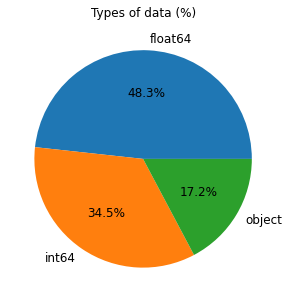

In [5]:
original_data.dtypes.value_counts().plot.pie(label="", title="Types of data (%)",figsize=(5, 5),autopct='%1.1f%%',fontsize=12)

► There are **3** types of data: integer, float, object.

► Most of the data are numerical. 

# Missing value:

<AxesSubplot:title={'center':'Features have missing values (%)'}>

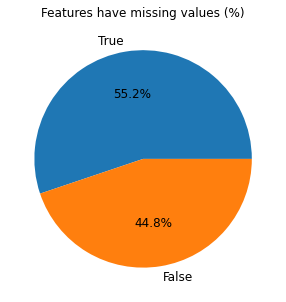

In [6]:
original_data.isna().any().value_counts().plot.pie(label="", title="Features have missing values (%)",figsize=(5, 5),autopct='%1.1f%%',fontsize=12)

► There are many features having missing values (**>50%**)

## - Missing-value rates of each feature:

In [7]:
missing_value_rate_df = round(100*(1-original_data.count()/len(original_data.index)),2).sort_values(ascending = False).to_frame(name = 'Missing values (%)')
missing_value_rate_df

,Missing values (%)
CancellationCode,97.30
LateAircraftDelay,75.53
SecurityDelay,75.53
NASDelay,75.53
WeatherDelay,75.53
CarrierDelay,75.53
ArrTime,2.93
ActualElapsedTime,2.93
AirTime,2.93
ArrDelay,2.93


► The missing-value rates in "CancellationCode","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","CarrierDelay" are
  too high => Drop these columns.

► The other rates are low => Drop rows that have missing value.    

In [8]:
#drop NaN rows:
cleaning_data = original_data.dropna(subset = ['ArrTime','ActualElapsedTime','AirTime','ArrDelay','TaxiIn','DepDelay','TaxiOut','DepTime','TailNum','CRSElapsedTime'])
cleaning_data = cleaning_data.reset_index(drop = 'True')
cleaning_data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


In [9]:
#drop "CancellationCode","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","CarrierDelay" columns:
cleaning_data = cleaning_data.drop(['CancellationCode',"WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","CarrierDelay"], axis=1)
cleaning_data.shape

(2319119, 23)

In [10]:
#after handling missing value:
cleaning_data.isna().any()

Year                 False
Month                False
DayofMonth           False
DayOfWeek            False
DepTime              False
CRSDepTime           False
ArrTime              False
CRSArrTime           False
UniqueCarrier        False
FlightNum            False
TailNum              False
ActualElapsedTime    False
CRSElapsedTime       False
AirTime              False
ArrDelay             False
DepDelay             False
Origin               False
Dest                 False
Distance             False
TaxiIn               False
TaxiOut              False
Cancelled            False
Diverted             False
dtype: bool

► No more missing value.

# Descriptive statistic:

## - Numerical features:

In [11]:
cleaning_data.describe(include=['int64','float64'], percentiles=[.01, .99])

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
count,2319119.0,2.319119e+06,2.319119e+06,2.319119e+06,2.319119e+06,2.319119e+06,2.319119e+06,2.319119e+06,2.319119e+06,2.319119e+06,2.319119e+06,2.319119e+06,2.319119e+06,2.319119e+06,2.319119e+06,2.319119e+06,2.319119e+06,2319119.0,2319119.0
mean,2008.0,2.510822e+00,1.569615e+01,3.915920e+00,1.340110e+03,1.329276e+03,1.485835e+03,1.495851e+03,2.193088e+03,1.286189e+02,1.297345e+02,1.051017e+02,1.027356e+01,1.138916e+01,7.298125e+02,6.839862e+00,1.667739e+01,0.0,0.0
std,0.0,1.123481e+00,8.744870e+00,1.982640e+00,4.802426e+02,4.660631e+02,5.081294e+02,4.848133e+02,1.942080e+03,7.025305e+01,6.971684e+01,6.766802e+01,3.963430e+01,3.642260e+01,5.591560e+02,4.846436e+00,1.101203e+01,0.0,0.0
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.400000e+01,-2.100000e+01,0.000000e+00,-9.100000e+01,-9.200000e+01,2.400000e+01,0.000000e+00,0.000000e+00,0.0,0.0
1%,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,5.490000e+02,6.000000e+02,3.300000e+01,4.201800e+02,2.000000e+01,3.800000e+01,3.900000e+01,2.200000e+01,-3.000000e+01,-1.200000e+01,8.900000e+01,2.000000e+00,5.000000e+00,0.0,0.0
50%,2008.0,3.000000e+00,1.600000e+01,4.000000e+00,1.331000e+03,1.322000e+03,1.516000e+03,1.519000e+03,1.529000e+03,1.110000e+02,1.120000e+02,8.700000e+01,0.000000e+00,0.000000e+00,5.850000e+02,6.000000e+00,1.400000e+01,0.0,0.0
99%,2008.0,4.000000e+00,3.100000e+01,7.000000e+00,2.248000e+03,2.231000e+03,2.340000e+03,2.340000e+03,7.259000e+03,3.610000e+02,3.648200e+02,3.310000e+02,1.740000e+02,1.670000e+02,2.556000e+03,2.600000e+01,5.900000e+01,0.0,0.0
max,2008.0,4.000000e+00,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.359000e+03,9.740000e+03,9.050000e+02,6.600000e+02,8.860000e+02,2.461000e+03,2.467000e+03,4.962000e+03,2.130000e+02,3.830000e+02,0.0,0.0


► "DepTime", "ArrTime", "ActualElapsedTime", "AirTime", "DepDelay" are the features that we can't collect at the time we predict. So we will drop these fetures.

► "Year", "Cancelled", "Diverted" are the features that have only one unique value. So we also drop these columns.

► "FlightNum" is the feature that don't have a influence on the target. We will drop this feature too.

In [12]:
#drop "DepTime", "ArrTime", "ActualElapsedTime", "AirTime", "DepDelay", "Year", "Cancelled", "Diverted", "FlightNum".
cleaning_data = cleaning_data.drop(["DepTime", "ArrTime", "ActualElapsedTime", "AirTime", "DepDelay", "Year", "Cancelled", "Diverted", "FlightNum"], axis=1)

In [13]:
cleaning_data.shape

(2319119, 14)

## - Categorical features:

In [14]:
cleaning_data.describe(include='object')

,UniqueCarrier,TailNum,Origin,Dest
count,2319119,2319119,2319119,2319119
unique,20,5025,291,291
top,WN,N693BR,ATL,ATL
freq,393732,1522,133852,133521


► "TailNum" has too much unique values, this may increases the training time and the ability of overfitting when we use OneHotEncoder in this feature => Drop this column.

In [15]:
#drop "TailNum":
cleaning_data = cleaning_data.drop(['TailNum'], axis=1)

In [16]:
cleaning_data.shape

(2319119, 13)

### + "UniqueCarrier":

In [17]:
cleaning_data['UniqueCarrier'].value_counts().to_frame()

,UniqueCarrier
WN,393732
AA,193114
OO,187917
MQ,158426
US,150891
UA,149156
DL,147987
XE,134444
NW,121162
CO,101394


### + "Origin":

In [18]:
s = cleaning_data['Origin'].value_counts().to_frame()
s

,Origin
ATL,133852
ORD,109196
DFW,88575
DEN,77025
LAX,72096
...,...
RHI,27
PLN,26
TUP,10
DLG,2


In [19]:
s.loc[s['Origin'] < 1000].count()

Origin    117
dtype: int64

► The distribution of "Origin" is very **skewed**

► There are **117/286** classes that have quantity < 1000

► Solution: group these classes into a new class: **"Other"**

In [20]:
#grouping:
for i in s.loc[s['Origin'] < 1000].index:
    cleaning_data.loc[cleaning_data['Origin'] == i, 'Origin'] = 'Other'

In [21]:
#after grouping:
cleaning_data['Origin'].value_counts().to_frame()

,Origin
ATL,133852
ORD,109196
DFW,88575
DEN,77025
LAX,72096
...,...
ROA,1081
AVL,1062
JAC,1056
CPR,1008


### + "Dest":

In [22]:
s = cleaning_data['Dest'].value_counts().to_frame()
s

,Dest
ATL,133521
ORD,108746
DFW,88146
DEN,77012
LAX,72079
...,...
RHI,27
PLN,26
TUP,9
AKN,2


In [23]:
s.loc[s['Dest'] < 1000].count()

Dest    118
dtype: int64

► The distribution of "Dest" is very **skewed**

► There are **118/286** classes that have quantity < 1000

► Solution: group these classes into a new class: **"Other"**

In [24]:
#grouping:
for i in s.loc[s['Dest'] < 1000].index:
    cleaning_data.loc[cleaning_data['Dest'] == i, 'Dest'] = 'Other'

In [25]:
#after grouping:
cleaning_data['Dest'].value_counts().to_frame()

,Dest
ATL,133521
ORD,108746
DFW,88146
DEN,77012
LAX,72079
...,...
IDA,1118
ROA,1088
AVL,1070
JAC,1065


In [26]:
cleaning_data.shape

(2319119, 13)

## - Duplicate rows:

In [27]:
#Number of duplicate rows:
cleaning_data[cleaning_data.duplicated()]

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,CRSElapsedTime,ArrDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
906508,2,28,4,835,1350,F9,195.0,-9.0,DEN,DCA,1476,6.0,14.0
906510,2,28,4,1435,1636,F9,241.0,4.0,DCA,DEN,1476,9.0,16.0
906512,2,28,4,1807,1902,F9,115.0,44.0,DEN,LAS,629,8.0,13.0
906514,2,28,4,1942,2229,F9,107.0,45.0,LAS,DEN,629,10.0,13.0


► There are 4 duplicates rows

In [28]:
#remove duplicate rows:
cleaning_data = cleaning_data.drop_duplicates()
cleaning_data = cleaning_data.reset_index(drop = 'True')
cleaning_data.shape

(2319115, 13)

# Visualization + EDA:

 - **"Month"** vs **"ArrDelay"**:

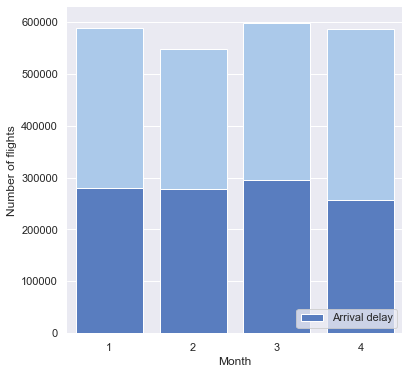

In [421]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 6))

#plot total of flights:
sns.set_color_codes("pastel")
sns.barplot(x=cleaning_data['Month'].value_counts().index, y=cleaning_data['Month'].value_counts(),
             color="b")

#plot arrival delay:
sns.set_color_codes("muted")
sns.barplot(x=cleaning_data.loc[cleaning_data['ArrDelay'] > 0,'Month'].value_counts().index, y=cleaning_data.loc[cleaning_data['ArrDelay'] > 0,'Month'].value_counts(), 
            label="Arrival delay", color="b")

ax.set(ylabel="Number of flights", xlabel="Month")
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

► **March** has **the most** number of flights.

► **February** has **the lowest** number of flights but **the number of delayed flights** in february is **almost the same** as that in **january** and **larger** than that in **april**.

- **"DayofMonth"** vs **"ArrDelay"**:

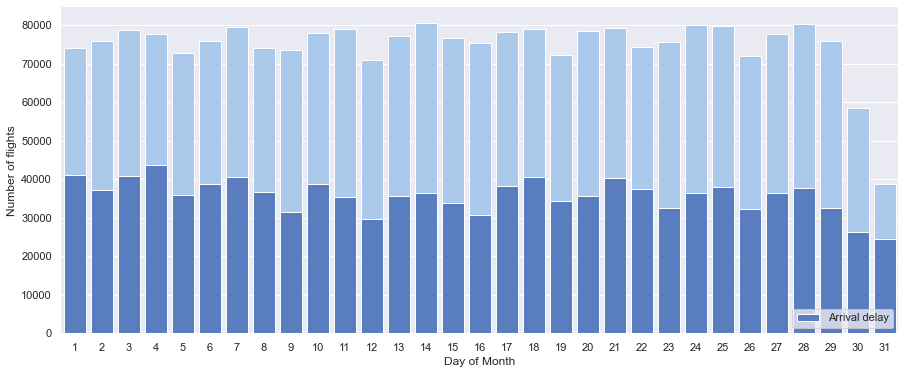

In [422]:
f, ax = plt.subplots(figsize=(15, 6))

#plot total of flights:
sns.set_color_codes("pastel")
sns.barplot(x=cleaning_data['DayofMonth'].value_counts().index, y=cleaning_data['DayofMonth'].value_counts(),
             color="b")

#plot arrival delay:
sns.set_color_codes("muted")
sns.barplot(x=cleaning_data.loc[cleaning_data['ArrDelay'] > 0,'DayofMonth'].value_counts().index, y=cleaning_data.loc[cleaning_data['ArrDelay'] > 0,'DayofMonth'].value_counts(), 
            label="Arrival delay", color="b")

ax.set(ylabel="Number of flights", xlabel="Day of Month")
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

► The ability of a delayed flight in **31st** is **very high**.

- **"DayofWeek"** vs **"ArrDelay"**:

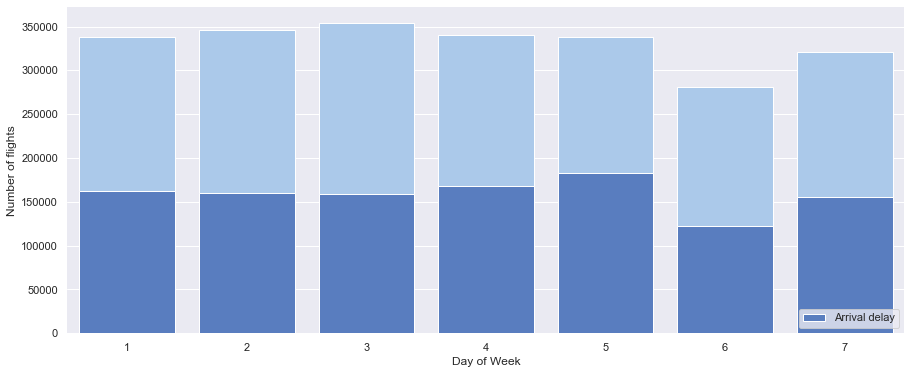

In [423]:
f, ax = plt.subplots(figsize=(15, 6))

#plot total of flights:
sns.set_color_codes("pastel")
sns.barplot(x=cleaning_data['DayOfWeek'].value_counts().index, y=cleaning_data['DayOfWeek'].value_counts(),
             color="b")

#plot arrival delay:
sns.set_color_codes("muted")
sns.barplot(x=cleaning_data.loc[cleaning_data['ArrDelay'] > 0,'DayOfWeek'].value_counts().index, y=cleaning_data.loc[cleaning_data['ArrDelay'] > 0,'DayOfWeek'].value_counts(), 
            label="Arrival delay", color="b")

ax.set(ylabel="Number of flights", xlabel="Day of Week")
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

► **Friday** has the lowest number of flights.

► The ability of a delayed flight in **Thursday** is **very high**.

- **"CRSDepTime"** vs **"ArrDelay"**:

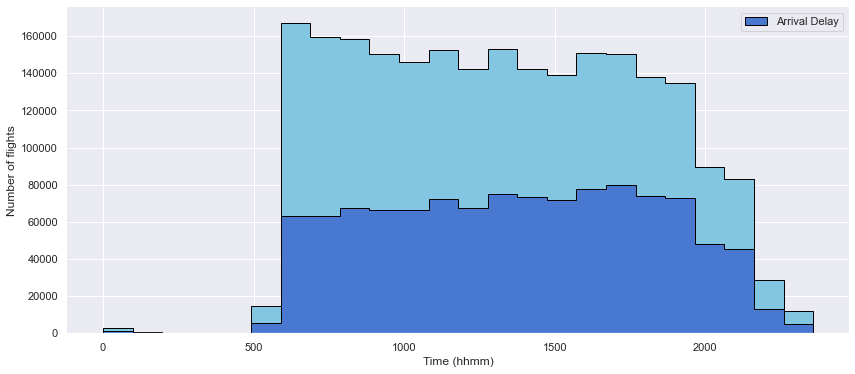

In [424]:
flight_crsDepTime_arr = cleaning_data['CRSDepTime']
delayed_flight_crsDepTime_arr = cleaning_data.loc[cleaning_data['ArrDelay'] > 0,'CRSDepTime']

f, ax = plt.subplots(figsize=(14, 6))
ax.hist([delayed_flight_crsDepTime_arr, flight_crsDepTime_arr], bins=24, color = ['b','c'], histtype = 'stepfilled', stacked = False
       ,label = ['Arrival Delay'], edgecolor = 'black')

ax.set(ylabel="Number of flights", xlabel="Time (hhmm)")
ax.legend(ncol=2, loc="upper right", frameon=True)
sns.despine(left=True)

► As we can see, a flight can be delayed **at any time**.

► There is **very few** of flights which depart in the time between **0AM** and **5AM**.

► The flights which depart in the time from **3PM to 12PM** have more **ability** to be delayed than that depart from **5AM** to
  **3PM**.

- **"UniqueCarrier"** vs **"ArrDelay"**:

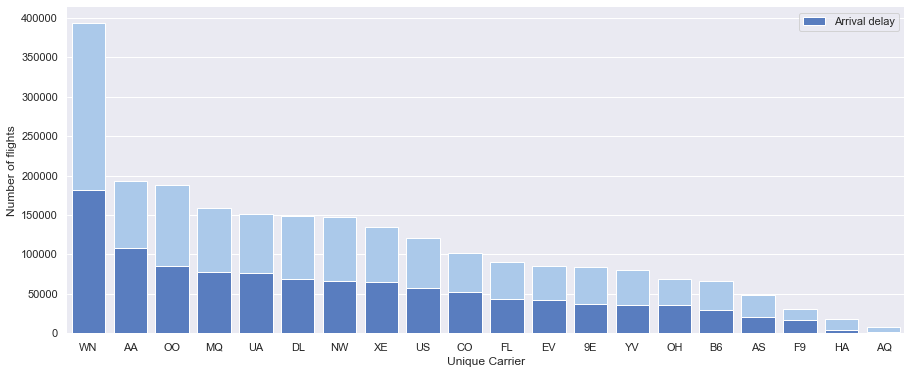

In [425]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 6))

#plot total of flights:
sns.set_color_codes("pastel")
sns.barplot(x=cleaning_data['UniqueCarrier'].value_counts().index, y=cleaning_data['UniqueCarrier'].value_counts(),
             color="b")

#plot arrival delay:
sns.set_color_codes("muted")
sns.barplot(x=cleaning_data.loc[cleaning_data['ArrDelay'] > 0,'UniqueCarrier'].value_counts().index, y=cleaning_data.loc[cleaning_data['ArrDelay'] > 0,'UniqueCarrier'].value_counts(), 
            label="Arrival delay", color="b")

ax.set(ylabel="Number of flights", xlabel="Unique Carrier")
ax.legend(ncol=2, loc="upper right", frameon=True)
sns.despine(left=True, bottom=True)

► The distribution of **"UniqueCarrier"** is very skewed, **"WN"** has about **400,000** flights, meanwhile **"AQ"** has only about **7000** flights.

► Because **"AQ"** has a few of flights, they **take care of** each flight **carefully** so the **ability** to be delayed in "AQ" is quite **low**.

- **"CRSElapsedTime"** vs **"ArrDelay"**:

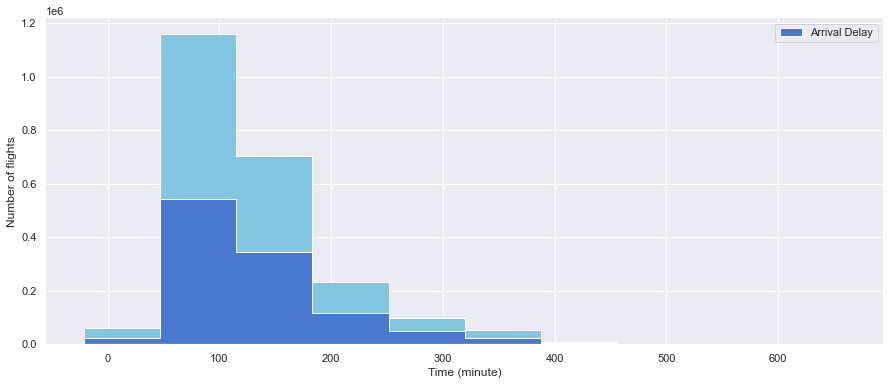

In [426]:
flight_crsElapsedTime_arr = cleaning_data['CRSElapsedTime']
delayed_flight_crsElapsedTime_arr = cleaning_data.loc[cleaning_data['ArrDelay'] > 0,'CRSElapsedTime']

f, ax = plt.subplots(figsize=(15, 6))
ax.hist([delayed_flight_crsElapsedTime_arr, flight_crsElapsedTime_arr], bins=10, color = ['b','c'], histtype = 'stepfilled', stacked = False
       ,label = ['Arrival Delay'])

ax.set(ylabel="Number of flights", xlabel="Time (minute)")
ax.legend(ncol=2, loc="upper right", frameon=True)
sns.despine(left=True)

► A flight often flies in the range from **50 minutes** to **200 minutes**.

- **"Origin"** vs **"ArrDelay"**:

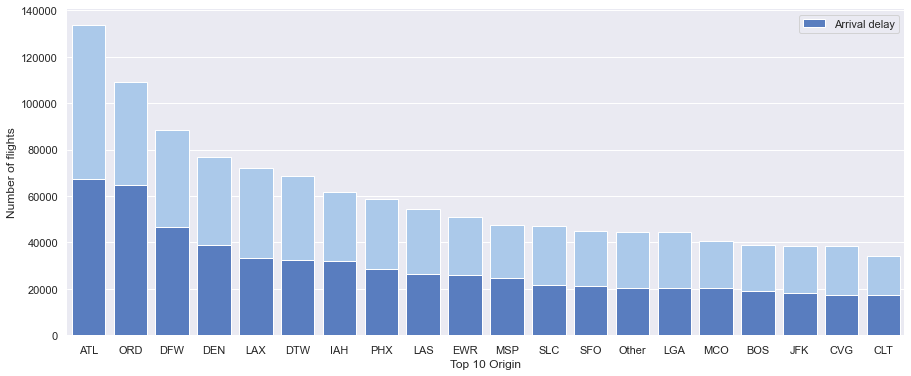

In [433]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 6))

#plot total of flights:
sns.set_color_codes("pastel")
sns.barplot(x=cleaning_data['Origin'].value_counts().head(20).index, y=cleaning_data['Origin'].value_counts().head(20),
             color="b")

#plot arrival delay:
sns.set_color_codes("muted")
sns.barplot(x=cleaning_data.loc[cleaning_data['ArrDelay'] > 0,'Origin'].value_counts().head(20).index, y=cleaning_data.loc[cleaning_data['ArrDelay'] > 0,'Origin'].value_counts().head(20), 
            label="Arrival delay", color="b")

ax.set(ylabel="Number of flights", xlabel="Top 10 Origin")
ax.legend(ncol=2, loc="upper right", frameon=True)
sns.despine(left=True, bottom=True)

► The number of flights in **"ATL"** is the **highest**. 

► The ability of a delayed flight in **"ORD"** is quite **high**. 

- **"Distance"** vs **"ArrDelay"**:

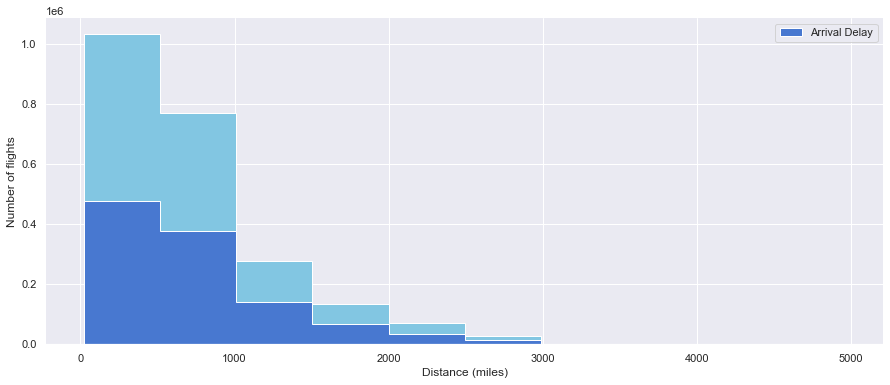

In [434]:
flight_distance_arr = cleaning_data['Distance']
delayed_flight_distance_arr = cleaning_data.loc[cleaning_data['ArrDelay'] > 0,'Distance']

f, ax = plt.subplots(figsize=(15, 6))
ax.hist([delayed_flight_distance_arr, flight_distance_arr], bins=10, color = ['b','c'], histtype = 'stepfilled', stacked = False
       ,label = ['Arrival Delay'])

ax.set(ylabel="Number of flights", xlabel="Distance (miles)")
ax.legend(ncol=2, loc="upper right", frameon=True)
sns.despine(left=True)

► The length of a flight is often from **100miles** to **1500miles**.

- **"TaxiIn"** vs **"ArrDelay"**:

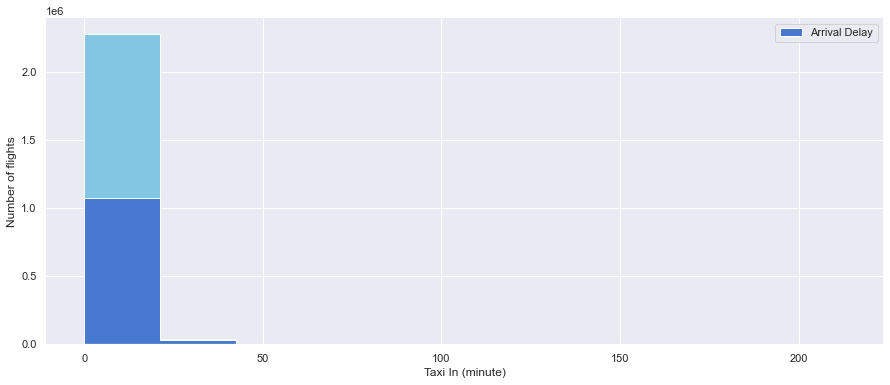

In [435]:
flight_taxiIn_arr = cleaning_data['TaxiIn']
delayed_flight_taxiIn_arr = cleaning_data.loc[cleaning_data['ArrDelay'] > 0,'TaxiIn']

f, ax = plt.subplots(figsize=(15, 6))
ax.hist([delayed_flight_taxiIn_arr, flight_taxiIn_arr], bins=10, color = ['b','c'], histtype = 'stepfilled', stacked = False
       ,label = ['Arrival Delay'])

ax.set(ylabel="Number of flights", xlabel="Taxi In (minute)")
ax.legend(ncol=2, loc="upper right", frameon=True)
sns.despine(left=True)

► The ability to be delayed of a flight which has TaxiIn is bigger than 25 minutes is very high.

# Get 100,000 rows from the dataset randomly:

In [38]:
used_data = cleaning_data.sample(n=100000, random_state=1)
used_data = used_data.reset_index(drop = 'True')
used_data.head()

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,CRSElapsedTime,ArrDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
0,4,12,6,1145,1316,UA,91.0,7.0,SFO,SAN,447,2.0,27.0
1,3,22,6,1245,1359,UA,134.0,20.0,DCA,ORD,612,4.0,10.0
2,3,20,4,1108,1225,FL,77.0,-3.0,ATL,DAB,366,4.0,13.0
3,1,6,7,1255,1355,WN,60.0,-3.0,PDX,GEG,279,2.0,6.0
4,2,8,5,1220,1421,9E,121.0,-14.0,GSO,DTW,460,9.0,14.0


In [39]:
used_data.shape

(100000, 13)

# Data transform:

In [40]:
#transforming target:
transformed_data = used_data
transformed_data['ArrDelay'] = used_data['ArrDelay'].apply(lambda x : 0 if x <= 0 else 1)
transformed_data.head(5)

#numerical features:
num_features = cleaning_data.select_dtypes(exclude='object').columns.to_list()
num_features.remove('ArrDelay')

In [41]:
#transforming categorical features:
cat_features = ['UniqueCarrier', 'Origin', 'Dest']
ohe = OneHotEncoder()
ohe.fit(transformed_data[cat_features])
transformed_cat_features = ohe.transform(transformed_data[cat_features]).toarray()
transformed_cat_features = pd.DataFrame(transformed_cat_features, columns=ohe.get_feature_names())
transformed_cat_features

,x0_9E,x0_AA,x0_AQ,x0_AS,x0_B6,x0_CO,x0_DL,x0_EV,x0_F9,x0_FL,...,x2_SWF,x2_SYR,x2_TLH,x2_TPA,x2_TUL,x2_TUS,x2_TYS,x2_VPS,x2_XNA,x2_YUM
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#transforming data:
transformed_data = pd.concat([transformed_data, transformed_cat_features], axis=1).drop(cat_features, axis=1)
transformed_data

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,CRSElapsedTime,ArrDelay,Distance,TaxiIn,TaxiOut,...,x2_SWF,x2_SYR,x2_TLH,x2_TPA,x2_TUL,x2_TUS,x2_TYS,x2_VPS,x2_XNA,x2_YUM
0,4,12,6,1145,1316,91.0,1,447,2.0,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,22,6,1245,1359,134.0,1,612,4.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,20,4,1108,1225,77.0,0,366,4.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,6,7,1255,1355,60.0,0,279,2.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,8,5,1220,1421,121.0,0,460,9.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3,11,2,615,710,55.0,0,204,3.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,4,26,6,1622,1847,145.0,0,873,2.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,1,1,2,945,1112,147.0,1,936,5.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,4,6,7,1945,2232,167.0,1,1111,7.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
transformed_data.dtypes.value_counts()

float64    372
int64        7
dtype: int64

► All features are **numerical** now.

# Top 10 important features using XGBoost:

[15:31:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


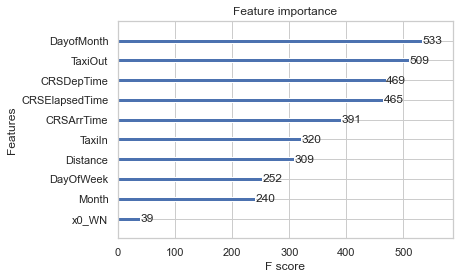

In [44]:
xgboost = XGBClassifier()
xgboost.fit(transformed_data.loc[:,transformed_data.columns != 'ArrDelay'], transformed_data.loc[:,'ArrDelay'])

plot_importance(xgboost, max_num_features=10) # top 10 most important features
plt.show()

# Train test split:

In [45]:
X = transformed_data.loc[:,transformed_data.columns != 'ArrDelay']
y = transformed_data.loc[:,'ArrDelay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [46]:
X_train.head()

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,CRSElapsedTime,Distance,TaxiIn,TaxiOut,x0_9E,...,x2_SWF,x2_SYR,x2_TLH,x2_TPA,x2_TUL,x2_TUS,x2_TYS,x2_VPS,x2_XNA,x2_YUM
22358,4,3,4,600,728,88.0,377,12.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37337,3,21,5,1730,1835,65.0,341,6.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61105,2,5,2,904,1711,307.0,2419,9.0,29.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23899,3,6,4,1234,1324,110.0,533,3.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12370,1,13,7,1010,1249,99.0,431,9.0,8.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
y_train

22358    1
37337    0
61105    0
23899    0
12370    1
        ..
80901    1
1990     1
6770     0
71228    0
6692     0
Name: ArrDelay, Length: 80000, dtype: int64

# Scaling:

In [48]:
scaler = StandardScaler()

scaled_X_train = X_train.copy()
scaled_X_test = X_test.copy()

scaled_X_train[num_features] = scaler.fit_transform(scaled_X_train[num_features])
scaled_X_test[num_features] = scaler.transform(scaled_X_test[num_features])

In [49]:
scaled_X_train

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,CRSElapsedTime,Distance,TaxiIn,TaxiOut,x0_9E,...,x2_SWF,x2_SYR,x2_TLH,x2_TPA,x2_TUL,x2_TUS,x2_TYS,x2_VPS,x2_XNA,x2_YUM
22358,1.329472,-1.453019,0.040386,-1.566821,-1.584409,-0.599918,-0.632527,1.073579,-0.799052,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37337,0.438786,0.605239,0.544339,0.860951,0.699254,-0.930030,-0.696979,-0.173578,-0.891272,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61105,-0.451901,-1.224323,-0.967521,-0.913686,0.443451,2.543327,3.023340,0.450000,1.137572,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23899,0.438786,-1.109976,0.040386,-0.204691,-0.354903,-0.284158,-0.353234,-0.797157,-0.522392,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12370,-1.342588,-0.309542,1.552245,-0.685948,-0.509623,-0.442038,-0.535849,0.450000,-0.799052,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80901,0.438786,-1.224323,-0.463568,-0.062892,0.024676,-0.025809,-0.143765,-0.589297,-0.061291,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1990,-1.342588,1.748716,0.040386,-0.653721,0.678625,2.442858,2.717192,1.073579,0.030929,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6770,1.329472,0.833935,-0.463568,0.240043,0.123697,-0.786503,-0.768592,0.657860,-0.891272,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71228,-0.451901,0.490892,-0.463568,0.882435,1.074708,-0.470743,-0.503622,3.775753,-1.167933,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
scaled_X_test

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,CRSElapsedTime,Distance,TaxiIn,TaxiOut,x0_9E,...,x2_SWF,x2_SYR,x2_TLH,x2_TPA,x2_TUL,x2_TUS,x2_TYS,x2_VPS,x2_XNA,x2_YUM
43461,0.438786,-1.567367,1.552245,0.366802,0.488836,0.333009,0.053172,0.450000,1.137572,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48882,1.329472,1.520021,-0.967521,-0.675206,0.028802,0.648769,0.951921,-0.797157,0.123150,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2013,1.329472,1.176978,1.048292,0.641807,0.895233,-0.111925,0.090769,0.034281,-0.522392,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96915,-1.342588,1.748716,0.040386,-0.395905,-0.398224,0.117718,-0.235072,0.034281,0.215370,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47318,0.438786,-1.453019,-1.471474,-0.814857,-0.107351,1.495579,1.566006,-0.589297,0.399810,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79474,0.438786,-0.195194,0.544339,1.559204,1.355266,-1.030499,-1.056836,-0.589297,0.123150,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52846,0.438786,-1.109976,0.040386,-0.492586,-0.579762,-0.786503,-0.704140,-0.589297,-0.891272,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64987,-0.451901,0.033501,1.048292,1.698854,1.363518,-0.470743,-0.410525,-0.173578,0.584251,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53745,1.329472,-0.080847,-0.967521,-0.847084,-0.734482,-0.068867,-0.005909,-0.381438,-0.706832,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Apply models without any feature selection:

## - Naive Bayes:

► In Naive Bayes, we don't use scaled data

In [51]:
NB = GaussianNB()
NB.fit(X_train, y_train)

NB_y_predict = NB.predict(X_test)

In [52]:
NB_y_predict

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [53]:
print(classification_report(y_test, NB_y_predict, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.60      0.29      0.39     10527
     class 1       0.50      0.78      0.61      9473

    accuracy                           0.52     20000
   macro avg       0.55      0.54      0.50     20000
weighted avg       0.55      0.52      0.49     20000



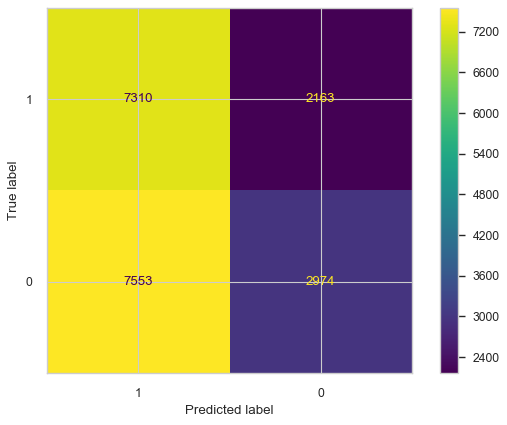

In [455]:
plot_confusion_matrix(NB, scaled_X_test, y_test, labels=[1,0])

In [55]:
#AUC:
NB_y_predict_scores = NB.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, NB_y_predict_scores[:,1])
nb_auc = auc(fpr, tpr)
print("AUC = ",nb_auc)

AUC =  0.5833226712215569


In [56]:
#Gini:
print("Gini = ",2*nb_auc-1)

Gini =  0.1666453424431138


## - Logistic regression:

In [57]:
lg = LogisticRegression()
lg.fit(scaled_X_train, y_train)

lg_y_predict = lg.predict(scaled_X_test)

In [58]:
lg_y_predict

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [59]:
print(classification_report(y_test, lg_y_predict, labels=[1,0], target_names=['class 1', 'class 0']))

              precision    recall  f1-score   support

     class 1       0.68      0.59      0.63      9473
     class 0       0.67      0.76      0.71     10527

    accuracy                           0.68     20000
   macro avg       0.68      0.67      0.67     20000
weighted avg       0.68      0.68      0.67     20000



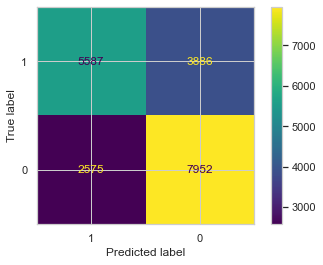

In [60]:
plot_confusion_matrix(lg, scaled_X_test, y_test, labels=[1,0])

In [61]:
#AUC:
lg_y_predict_scores = lg.predict_proba(scaled_X_test)
fpr, tpr, thresholds = roc_curve(y_test, lg_y_predict_scores[:,1])
lr_auc = auc(fpr, tpr)
print("AUC = ",lr_auc)

AUC =  0.7335451275472858


In [62]:
#Gini
print("Gini = ",lr_auc*2-1)

Gini =  0.4670902550945717


## - Decision tree:

In [63]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

dt_y_predict = dtc.predict(X_test)

In [64]:
dt_y_predict

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [65]:
print(classification_report(y_test, dt_y_predict, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.63      0.63      0.63     10527
     class 1       0.59      0.59      0.59      9473

    accuracy                           0.61     20000
   macro avg       0.61      0.61      0.61     20000
weighted avg       0.61      0.61      0.61     20000



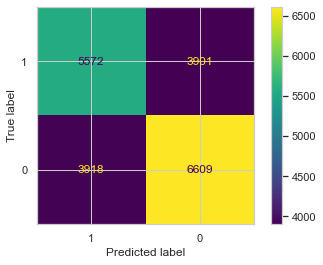

In [66]:
plot_confusion_matrix(dtc, X_test, y_test, labels=[1,0])

In [67]:
#AUC:
dt_y_predict_scores = dtc.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, dt_y_predict_scores[:,1])
dt_auc = auc(fpr, tpr)
print("AUC = ",dt_auc)

AUC =  0.6080061143011876


In [68]:
print("Gini = ", 2*dt_auc-1)

Gini =  0.21601222860237512


## - Random forest:

In [69]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

rf_y_predict = rf.predict(X_test)

In [70]:
print(classification_report(y_test, rf_y_predict, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.68      0.75      0.71     10527
     class 1       0.69      0.60      0.64      9473

    accuracy                           0.68     20000
   macro avg       0.68      0.68      0.68     20000
weighted avg       0.68      0.68      0.68     20000



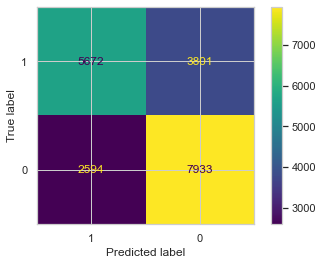

In [71]:
plot_confusion_matrix(rf, X_test, y_test, labels=[1,0])

In [72]:
rf_y_predict_scores = rf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, rf_y_predict_scores[:,1])
rf_auc = auc(fpr, tpr)
print("AUC = ",rf_auc)

AUC =  0.7451002695275563


In [73]:
print("Gini = ", 2*rf_auc-1)

Gini =  0.4902005390551125


## - Gradient Boosting:

In [74]:
GB = GradientBoostingClassifier(n_estimators=100)
GB.fit(X_train, y_train)

GB_y_predict = GB.predict(X_test)

In [75]:
GB_y_predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [76]:
print(classification_report(y_test, GB_y_predict, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.66      0.79      0.72     10527
     class 1       0.70      0.55      0.61      9473

    accuracy                           0.67     20000
   macro avg       0.68      0.67      0.66     20000
weighted avg       0.68      0.67      0.67     20000



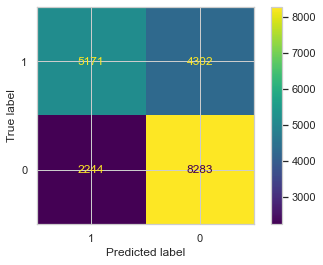

In [77]:
plot_confusion_matrix(GB, X_test, y_test, labels=[1,0])

In [78]:
gb_y_predict_scores = GB.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, gb_y_predict_scores[:,1])
gb_auc = auc(fpr, tpr)
print("AUC = ",gb_auc)

AUC =  0.7326747602849919


In [79]:
print("Gini = ", 2*gb_auc-1)

Gini =  0.4653495205699838


## - SVM:

► It takes **too long** time to run this model!!

In [ ]:
svm = SVC(kernel='linear')
svm.fit(scaled_X_train, y_train)

svm_y_predict = svm.predict(scaled_X_test)

In [ ]:
svm_y_predict

In [ ]:
print(classification_report(y_test, svm_y_predict, target_names=['class 0', 'class 1']))

In [ ]:
plot_confusion_matrix(svm, scaled_X_test, y_test, labels=[1,0])

# - XGBoost:

In [81]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

xgb_y_predict = xgb.predict(X_test)

[15:42:36] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [82]:
xgb_y_predict

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [83]:
print(classification_report(y_test, xgb_y_predict, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.68      0.77      0.73     10527
     class 1       0.71      0.60      0.65      9473

    accuracy                           0.69     20000
   macro avg       0.70      0.69      0.69     20000
weighted avg       0.69      0.69      0.69     20000



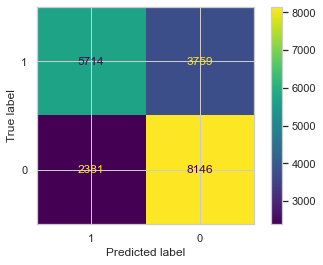

In [84]:
plot_confusion_matrix(xgb, X_test, y_test, labels=[1,0])

In [85]:
#AUC:
xgb_y_predict_scores = xgb.predict_proba(X_test)
xgb_y_predict_scores = xgb_y_predict_scores[:,1]
fpr, tpr, thresholds = roc_curve(y_test, xgb_y_predict_scores)
xgb_auc = auc(fpr, tpr)
print("AUC = ",xgb_auc)

AUC =  0.7591902765631962


In [86]:
print("Gini = ",2*xgb_auc-1)

Gini =  0.5183805531263923


## => RANKING MODEL USING GINI:

1. XGBOOST
2. RANDOM FOREST 
3. LOGISTIC REGRESSION 
4. GRADIENT BOOSTING 
5. DECISION TREE 
6. NAIVE BAYES 
7. SVM : **can't solve!** 

► **SVM takes a lot of time to training!**

► **The performances of Naive bayes and Decision tree are quite low.**

# Apply models with feature selection:

## - PCA:

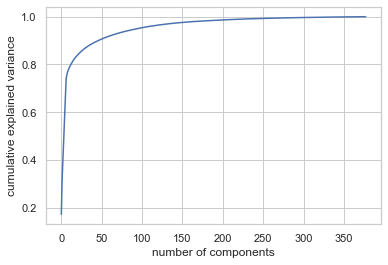

In [87]:
pca = PCA()
pca.fit(scaled_X_train)

#plot: explained_variance_ratio_
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [88]:
pca = PCA(n_components=0.95)
pca.fit(scaled_X_train)

pca_X_train = pca.transform(scaled_X_train)
pca_X_test = pca.transform(scaled_X_test)

In [90]:
pca_X_train.shape

(80000, 96)

### + Naive Bayes:

In [91]:
pca_NB = GaussianNB()
pca_NB.fit(pca_X_train, y_train)

pca_NB_y_predict = pca_NB.predict(pca_X_test)

In [92]:
pca_NB_y_predict

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [93]:
print(classification_report(y_test, pca_NB_y_predict, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.61      0.63      0.62     10527
     class 1       0.57      0.56      0.57      9473

    accuracy                           0.60     20000
   macro avg       0.59      0.59      0.59     20000
weighted avg       0.59      0.60      0.59     20000



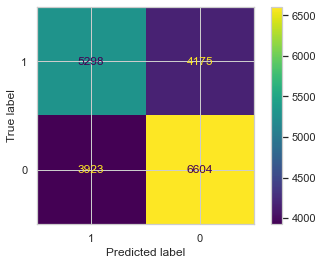

In [94]:
plot_confusion_matrix(pca_NB, pca_X_test, y_test, labels=[1,0])

In [95]:
#AUC:
pca_NB_y_predict_scores = pca_NB.predict_proba(pca_X_test)
fpr, tpr, thresholds = roc_curve(y_test, pca_NB_y_predict_scores[:,1])
pca_NB_auc = auc(fpr, tpr)
print("AUC = ",pca_NB_auc)

AUC =  0.6340288921017453


In [96]:
print("Gini = ",2*pca_NB_auc-1)

Gini =  0.2680577842034906


### + Logistic Regression:

In [97]:
pca_lr = LogisticRegression()
pca_lr.fit(pca_X_train, y_train)

pca_lr_y_predict = pca_lr.predict(pca_X_test)

In [98]:
pca_lr_y_predict

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [99]:
print(classification_report(y_test, pca_lr_y_predict, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.66      0.76      0.71     10527
     class 1       0.68      0.57      0.62      9473

    accuracy                           0.67     20000
   macro avg       0.67      0.66      0.66     20000
weighted avg       0.67      0.67      0.66     20000



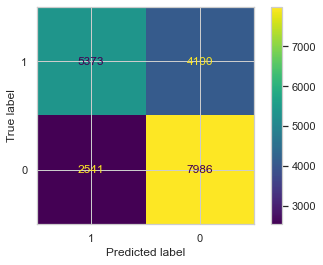

In [100]:
plot_confusion_matrix(pca_lr, pca_X_test, y_test, labels=[1,0])

In [101]:
pca_lr_y_predict_scores = pca_lr.decision_function(pca_X_test)
fpr, tpr, thresholds = roc_curve(y_test, pca_lr_y_predict_scores)
pca_lr_auc = auc(fpr, tpr)
print("AUC = ",pca_lr_auc)

AUC =  0.722358328562333


In [102]:
print("Gini = ",pca_lr_auc*2-1)

Gini =  0.4447166571246659


### + Decision tree:

In [103]:
pca_dt = DecisionTreeClassifier()
pca_dt.fit(pca_X_train, y_train)

pca_dt_y_predict = pca_dt.predict(pca_X_test)

In [104]:
pca_dt_y_predict

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [105]:
print(classification_report(y_test, pca_dt_y_predict, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.62      0.61      0.61     10527
     class 1       0.57      0.58      0.57      9473

    accuracy                           0.59     20000
   macro avg       0.59      0.59      0.59     20000
weighted avg       0.59      0.59      0.59     20000



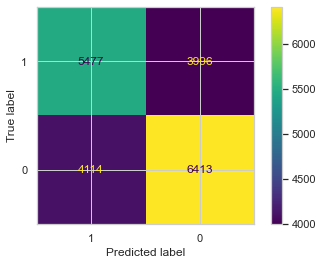

In [106]:
plot_confusion_matrix(pca_dt, pca_X_test, y_test, labels=[1,0])

In [107]:
#AUC:
pca_dt_y_predict_scores = pca_dt.predict_proba(pca_X_test)
fpr, tpr, thresholds = roc_curve(y_test, pca_dt_y_predict_scores[:,1])
pca_dt_auc = auc(fpr, tpr)
print("AUC = ",pca_dt_auc)

AUC =  0.5936824683826144


In [108]:
#GINI:
print("Gini = ",2*pca_dt_auc-1)

Gini =  0.1873649367652288


### + Random forest:

In [109]:
pca_rf = RandomForestClassifier(n_estimators = 100)
pca_rf.fit(pca_X_train, y_train)

pca_rf_y_predict = pca_rf.predict(pca_X_test)

In [110]:
pca_rf_y_predict

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [111]:
print(classification_report(y_test, pca_rf_y_predict, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.67      0.73      0.70     10527
     class 1       0.66      0.60      0.63      9473

    accuracy                           0.67     20000
   macro avg       0.67      0.66      0.66     20000
weighted avg       0.67      0.67      0.67     20000



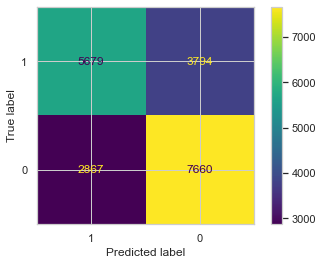

In [112]:
plot_confusion_matrix(pca_rf, pca_X_test, y_test, labels=[1,0])

In [113]:
#AUC:
pca_rf_y_predict_scores = pca_rf.predict_proba(pca_X_test)
fpr, tpr, thresholds = roc_curve(y_test, pca_rf_y_predict_scores[:,1])
pca_rf_auc = auc(fpr, tpr)
print("AUC = ",pca_rf_auc)

AUC =  0.7258018221426186


In [114]:
#gini:
print("Gini = ",2*pca_rf_auc-1)

Gini =  0.45160364428523714


### + Gradient Boosting:

In [115]:
pca_gb = GradientBoostingClassifier(n_estimators=100)
pca_gb.fit(pca_X_train, y_train)

pca_gb_y_predict = pca_gb.predict(pca_X_test)

In [116]:
pca_gb_y_predict

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [117]:
print(classification_report(y_test, pca_gb_y_predict, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.66      0.79      0.72     10527
     class 1       0.70      0.54      0.61      9473

    accuracy                           0.67     20000
   macro avg       0.68      0.66      0.66     20000
weighted avg       0.68      0.67      0.67     20000



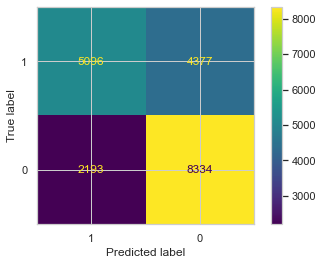

In [118]:
plot_confusion_matrix(pca_gb, pca_X_test, y_test, labels=[1,0])

In [119]:
#auc:
pca_gb_y_predict_scores = pca_gb.predict_proba(pca_X_test)
fpr, tpr, thresholds = roc_curve(y_test, pca_gb_y_predict_scores[:,1])
pca_gb_auc = auc(fpr, tpr)
print("AUC = ",pca_gb_auc)

AUC =  0.7316813212166017


In [120]:
#gini:
print("gini = ",pca_gb_auc*2-1)

gini =  0.46336264243320335


### + SVM:

In [121]:
pca_svm = SVC()
pca_svm.fit(pca_X_train, y_train)

pca_svm_y_predict = pca_svm.predict(pca_X_test)

In [122]:
pca_svm_y_predict

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [123]:
print(classification_report(y_test, pca_svm_y_predict, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.68      0.80      0.73     10527
     class 1       0.72      0.57      0.64      9473

    accuracy                           0.69     20000
   macro avg       0.70      0.69      0.69     20000
weighted avg       0.70      0.69      0.69     20000



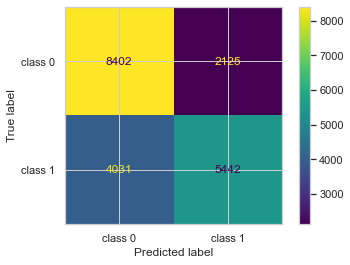

In [124]:
plot_confusion_matrix(pca_svm, pca_X_test, y_test, display_labels=['class 0', 'class 1'])

In [125]:
#auc:
pca_svm_y_predict_scores = pca_svm.decision_function(pca_X_test)
fpr, tpr, thresholds = roc_curve(y_test, pca_svm_y_predict_scores)
pca_svm_auc = auc(fpr, tpr)
print("AUC = ",pca_svm_auc)

AUC =  0.7552563057854951


In [126]:
#gini: 0.7595594078007966
print("gini = ",pca_svm_auc*2-1)

gini =  0.5105126115709901


### + XGBoost:

In [127]:
pca_xgb = XGBClassifier(n_estimators=100)
pca_xgb.fit(pca_X_train, y_train)

pca_xgb_y_predict = pca_xgb.predict(pca_X_test)

[16:15:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [128]:
pca_xgb_y_predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [129]:
print(classification_report(y_test, pca_xgb_y_predict, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.68      0.76      0.72     10527
     class 1       0.69      0.60      0.64      9473

    accuracy                           0.69     20000
   macro avg       0.69      0.68      0.68     20000
weighted avg       0.69      0.69      0.68     20000



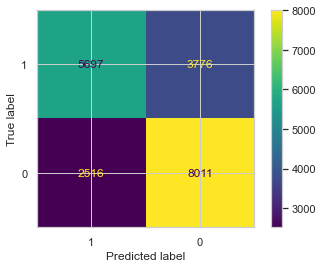

In [130]:
plot_confusion_matrix(pca_xgb, pca_X_test, y_test, labels=[1,0])

In [131]:
#auc:
pca_xgb_y_predict_scores = pca_xgb.predict_proba(pca_X_test)
fpr, tpr, thresholds = roc_curve(y_test, pca_xgb_y_predict_scores[:,1])
pca_xgb_auc = auc(fpr, tpr)
print("AUC = ",pca_xgb_auc)

AUC =  0.7474275079435364


In [132]:
#gini
print("gini = ",2*pca_xgb_auc-1)

gini =  0.4948550158870728


### => Ranking models using Gini:

1. SVM
2. XGBOOST 
3. GRADIENT BOOSTING 
4. RANDOM FOREST 
5. LOGISTIC REGRESSION 
6. NAIVE BAYES 
7. DECISION TREE 

► **There is a huge decrease in training time of SVM.**

► **All models have a little decrease in performance except NAIVE BAYES**

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## - SelectKbest:

In [133]:
skb = SelectKBest(f_classif, k = 'all')
skb.fit(scaled_X_train, y_train)

#choosing features have pvalue < 0.05:
count = 0
for i in skb.pvalues_:
    if i < 0.05:
        count = count + 1

print("There are ",count," features have p-value < 0.05")

There are  125  features have p-value < 0.05


In [134]:
skb = SelectKBest(f_classif, k = count)
skb.fit(scaled_X_train, y_train)

skb_X_train = skb.transform(scaled_X_train)
skb_X_test = skb.transform(scaled_X_test)

In [135]:
skb_X_train.shape

(80000, 125)

In [136]:
skb_X_test.shape

(20000, 125)

### + Naive Bayes:

In [137]:
skb_NB = GaussianNB()
skb_NB.fit(skb.transform(X_train), y_train)

skb_NB_y_predict = skb_NB.predict(skb.transform(X_test))

In [138]:
skb_NB_y_predict

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [139]:
print(classification_report(y_test, skb_NB_y_predict, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.63      0.22      0.32     10527
     class 1       0.50      0.86      0.63      9473

    accuracy                           0.52     20000
   macro avg       0.56      0.54      0.47     20000
weighted avg       0.56      0.52      0.47     20000



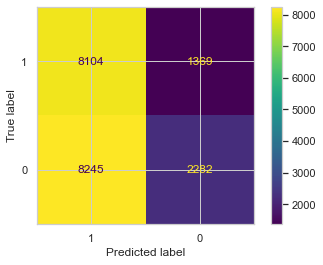

In [140]:
plot_confusion_matrix(skb_NB, skb.transform(X_test), y_test, labels=[1,0])

In [141]:
#auc:
skb_nb_y_predict_scores = skb_NB.predict_proba(skb.transform(X_test))
fpr, tpr, thresholds = roc_curve(y_test, skb_nb_y_predict_scores[:,1])
skb_nb_auc = auc(fpr, tpr)
print("AUC = ",skb_nb_auc)

AUC =  0.6080962997723949


In [142]:
#gini:
print("Gini = ", skb_nb_auc*2-1)

Gini =  0.21619259954478975


### + Logistic Regression:

In [143]:
skb_lr = LogisticRegression()
skb_lr.fit(skb_X_train, y_train)

skb_lr_y_predict = skb_lr.predict(skb_X_test)

In [144]:
skb_lr_y_predict

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [145]:
print(classification_report(y_test, skb_lr_y_predict, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.66      0.75      0.70     10527
     class 1       0.67      0.56      0.61      9473

    accuracy                           0.66     20000
   macro avg       0.67      0.66      0.66     20000
weighted avg       0.67      0.66      0.66     20000



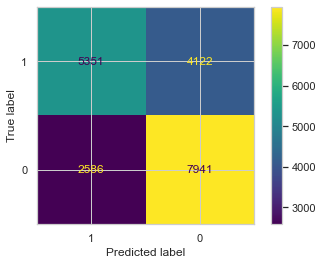

In [146]:
plot_confusion_matrix(skb_lr, skb_X_test, y_test, labels=[1,0])

In [147]:
#auc:
skb_lr_y_predict_scores = skb_lr.predict_proba(skb_X_test)
fpr, tpr, thresholds = roc_curve(y_test, skb_lr_y_predict_scores[:,1])
skb_lr_auc = auc(fpr, tpr)
print("AUC = ",skb_lr_auc)

AUC =  0.7204905612308007


In [148]:
#gini:
print("Gini = ", skb_lr_auc*2-1)

Gini =  0.44098112246160137


### + Decision tree:

In [149]:
skb_dt = DecisionTreeClassifier()
skb_dt.fit(skb_X_train, y_train)

skb_dt_y_predict = skb_dt.predict(skb_X_test)

In [150]:
skb_dt_y_predict

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [151]:
print(classification_report(y_test, skb_dt_y_predict, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.62      0.61      0.62     10527
     class 1       0.58      0.59      0.58      9473

    accuracy                           0.60     20000
   macro avg       0.60      0.60      0.60     20000
weighted avg       0.60      0.60      0.60     20000



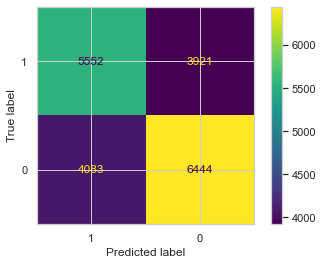

In [152]:
plot_confusion_matrix(skb_dt, skb_X_test, y_test, labels=[1,0])

In [153]:
#auc:
skb_dt_y_predict_scores = skb_dt.predict_proba(skb_X_test)
fpr, tpr, thresholds = roc_curve(y_test, skb_dt_y_predict_scores[:,1])
skb_dt_auc = auc(fpr, tpr)
print("AUC = ",skb_dt_auc)

AUC =  0.5991134919099466


In [154]:
#Gini:
print(2*skb_dt_auc-1)

0.19822698381989312


### + Random forest:

In [155]:
skb_rf = RandomForestClassifier(n_estimators=100)
skb_rf.fit(skb.transform(X_train), y_train)

skb_rf_y_predict = skb_rf.predict(skb.transform(X_test))

In [156]:
skb_rf_y_predict

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [157]:
print(classification_report(y_test, skb_dt_y_predict, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.62      0.61      0.62     10527
     class 1       0.58      0.59      0.58      9473

    accuracy                           0.60     20000
   macro avg       0.60      0.60      0.60     20000
weighted avg       0.60      0.60      0.60     20000



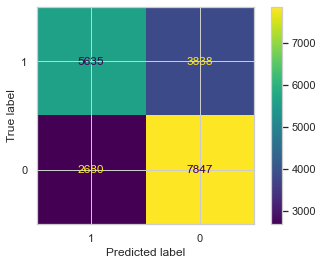

In [158]:
plot_confusion_matrix(skb_rf, skb.transform(X_test), y_test, labels=[1,0])

In [159]:
#auc:
skb_rf_y_predict_scores = skb_rf.predict_proba(skb.transform(X_test))
fpr, tpr, thresholds = roc_curve(y_test, skb_rf_y_predict_scores[:,1])
skb_rf_auc = auc(fpr, tpr)
print("AUC = ",skb_rf_auc)

AUC =  0.7353672079930871


In [160]:
print("Gini = ", 2*skb_rf_auc-1)

Gini =  0.47073441598617416


### + Gradient boosting:

In [161]:
skb_gb = GradientBoostingClassifier(n_estimators=100)
skb_gb.fit(skb.transform(X_train), y_train)

skb_gb_y_predict = skb_gb.predict(skb.transform(X_test))

In [162]:
skb_gb_y_predict

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [163]:
print(classification_report(y_test, skb_gb_y_predict, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.66      0.78      0.71     10527
     class 1       0.69      0.54      0.61      9473

    accuracy                           0.67     20000
   macro avg       0.67      0.66      0.66     20000
weighted avg       0.67      0.67      0.66     20000



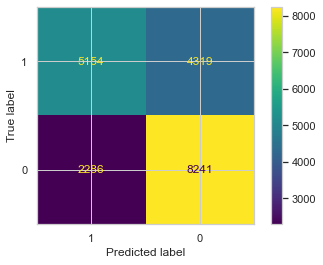

In [164]:
plot_confusion_matrix(skb_gb, skb.transform(X_test), y_test, labels=[1,0])

In [165]:
#auc:
skb_gb_y_predict_scores = skb_gb.predict_proba(skb.transform(X_test))
fpr, tpr, thresholds = roc_curve(y_test, skb_gb_y_predict_scores[:,1])
skb_gb_auc = auc(fpr, tpr)
print("AUC = ",skb_gb_auc)

AUC =  0.7281261023427756


In [166]:
#gini:
print("gini = ", 2*skb_gb_auc-1)

gini =  0.4562522046855513


### + SVM:

In [167]:
skb_svm = SVC()
skb_svm.fit(skb_X_train, y_train)

skb_svm_y_predict = skb_svm.predict(skb_X_test)

In [168]:
skb_svm_y_predict

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [169]:
print(classification_report(y_test, skb_svm_y_predict, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.67      0.80      0.73     10527
     class 1       0.72      0.56      0.63      9473

    accuracy                           0.69     20000
   macro avg       0.69      0.68      0.68     20000
weighted avg       0.69      0.69      0.68     20000



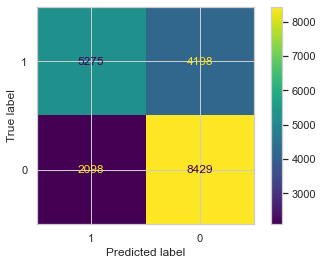

In [170]:
plot_confusion_matrix(skb_svm, skb_X_test, y_test, labels=[1,0])

In [171]:
#auc:
skb_svm_y_predict_scores = skb_svm.decision_function(skb_X_test)
fpr, tpr, thresholds = roc_curve(y_test, skb_svm_y_predict_scores)
skb_svm_auc = auc(fpr, tpr)
print("AUC = ",skb_svm_auc)

AUC =  0.7472222930021317


In [172]:
#gini:
print("Gini = ", 2*skb_svm_auc-1)

Gini =  0.49444458600426344


### + XGBoost:

In [173]:
skb_xgb = XGBClassifier(n_estimators=100)
skb_xgb.fit(skb.transform(X_train), y_train)

skb_xgb_y_predict = skb_xgb.predict(skb.transform(X_test))

[16:44:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [174]:
skb_xgb_y_predict

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [175]:
print(classification_report(y_test, skb_xgb_y_predict, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.68      0.77      0.72     10527
     class 1       0.70      0.60      0.65      9473

    accuracy                           0.69     20000
   macro avg       0.69      0.69      0.69     20000
weighted avg       0.69      0.69      0.69     20000



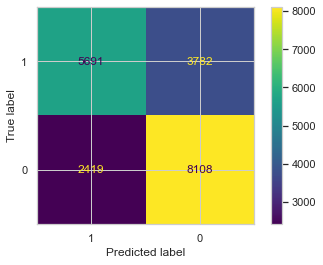

In [176]:
plot_confusion_matrix(skb_xgb, skb.transform(X_test), y_test, labels=[1,0])

In [177]:
#auc:
skb_xgb_y_predict_scores = skb_xgb.predict_proba(skb.transform(X_test))
fpr, tpr, thresholds = roc_curve(y_test, skb_xgb_y_predict_scores[:,1])
skb_xgb_auc = auc(fpr, tpr)
print("AUC = ",skb_xgb_auc)

AUC =  0.7542161419488732


In [178]:
print("Gini = ", 2*skb_xgb_auc-1)

Gini =  0.5084322838977464


### => Ranking models:

1. XGBOOST 
2. SVM 
3. RANDOM FOREST 
4. GRADIENT BOOSTING
5. LOGISTIC REGRESSION 
6. NAIVE BAYES 
7. DECISION TREE 

► **SelectKbest improves the training time and the performance.**

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### + RFECV:

In [179]:
%%time
#using randomForestClassifier for RFE:
rf_for_rfe = RandomForestClassifier(n_estimators=100)
rfecv = RFECV(estimator=rf_for_rfe, scoring='accuracy', step=5)

rfecv.fit(scaled_X_train, y_train)
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 138
Wall time: 2h 58min 23s


In [180]:
rfecv_X_train = rfecv.transform(scaled_X_train)
rfecv_X_test = rfecv.transform(scaled_X_test)

In [185]:
rfecv_X_train.shape

(80000, 138)

In [184]:
rfecv_X_test.shape

(20000, 138)

### + Naive Bayes:

In [186]:
rfecv_nb = GaussianNB()
rfecv_nb.fit(rfecv.transform(X_train), y_train)

rfecv_nb_y_predict = rfecv_nb.predict(rfecv.transform(X_test))

In [187]:
rfecv_nb_y_predict

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [188]:
print(classification_report(y_test, rfecv_nb_y_predict, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.61      0.54      0.57     10527
     class 1       0.55      0.61      0.58      9473

    accuracy                           0.57     20000
   macro avg       0.58      0.58      0.57     20000
weighted avg       0.58      0.57      0.57     20000



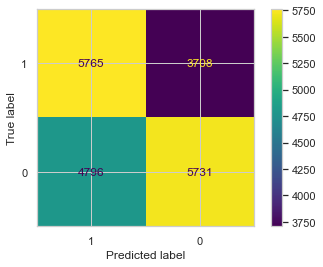

In [189]:
plot_confusion_matrix(rfecv_nb, rfecv.transform(X_test), y_test, labels=[1,0])

In [190]:
#auc:
rfecv_nb_y_predict_scores = rfecv_nb.predict_proba(rfecv.transform(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfecv_nb_y_predict_scores[:,1])
rfecv_nb_auc = auc(fpr, tpr)
print("AUC = ",rfecv_nb_auc)

AUC =  0.6100234269634714


In [191]:
print("Gini = ", 2*rfecv_nb_auc-1)

Gini =  0.2200468539269429


### + Logistic Regression:

In [192]:
rfecv_lr = LogisticRegression()
rfecv_lr.fit(rfecv_X_train, y_train)

rfecv_lr_y_predict = rfecv_lr.predict(rfecv_X_test)

In [193]:
rfecv_lr_y_predict

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [194]:
print(classification_report(y_test, rfecv_lr_y_predict, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.67      0.76      0.71     10527
     class 1       0.68      0.58      0.62      9473

    accuracy                           0.67     20000
   macro avg       0.67      0.67      0.67     20000
weighted avg       0.67      0.67      0.67     20000



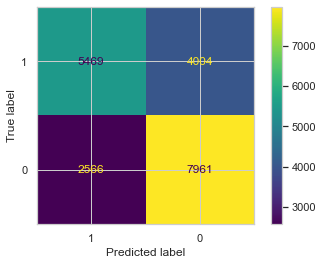

In [195]:
plot_confusion_matrix(rfecv_lr, rfecv_X_test, y_test, labels=[1,0])

In [196]:
#auc:
rfecv_lr_y_predict_scores = rfecv_lr.predict_proba(rfecv_X_test)
fpr, tpr, thresholds = roc_curve(y_test, rfecv_lr_y_predict_scores[:,1])
rfecv_lr_auc = auc(fpr, tpr)
print("AUC = ",rfecv_lr_auc)

AUC =  0.7271256287374361


In [197]:
print("Gini = ", 2*rfecv_lr_auc-1)

Gini =  0.45425125747487227


### + Decision Tree:

In [198]:
rfecv_dt = DecisionTreeClassifier()
rfecv_dt.fit(rfecv.transform(X_train), y_train)

rfecv_dt_y_predict = rfecv_dt.predict(rfecv.transform(X_test))

In [199]:
rfecv_dt_y_predict

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [200]:
print(classification_report(y_test, rfecv_dt_y_predict, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.63      0.62      0.63     10527
     class 1       0.59      0.59      0.59      9473

    accuracy                           0.61     20000
   macro avg       0.61      0.61      0.61     20000
weighted avg       0.61      0.61      0.61     20000



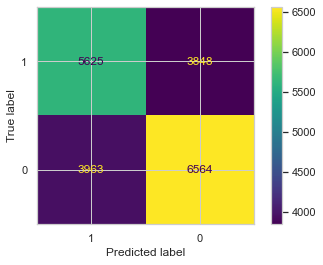

In [201]:
plot_confusion_matrix(rfecv_dt, rfecv.transform(X_test), y_test, labels=[1,0])

In [202]:
#auc:
rfecv_dt_y_predict_scores = rfecv_dt.predict_proba(rfecv.transform(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfecv_dt_y_predict_scores[:,1])
rfecv_dt_auc = auc(fpr, tpr)
print("AUC = ",rfecv_dt_auc)

AUC =  0.6086661774880759


In [203]:
print("Gini = ", 2*rfecv_dt_auc-1)

Gini =  0.2173323549761519


### + Random Forest:

In [204]:
rfecv_rf = RandomForestClassifier(n_estimators=100)
rfecv_rf.fit(rfecv.transform(X_train), y_train)

rfecv_rf_y_predict = rfecv_rf.predict(rfecv.transform(X_test))

In [205]:
rfecv_rf_y_predict

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [206]:
print(classification_report(y_test, rfecv_rf_y_predict, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.68      0.76      0.72     10527
     class 1       0.69      0.60      0.64      9473

    accuracy                           0.68     20000
   macro avg       0.69      0.68      0.68     20000
weighted avg       0.69      0.68      0.68     20000



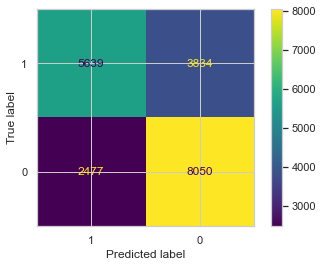

In [207]:
plot_confusion_matrix(rfecv_rf, rfecv.transform(X_test), y_test, labels=[1,0])

In [208]:
#auc:
rfecv_rf_y_predict_scores = rfecv_rf.predict_proba(rfecv.transform(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfecv_rf_y_predict_scores[:,1])
rfecv_rf_auc = auc(fpr, tpr)
print("AUC = ",rfecv_rf_auc)

AUC =  0.7466207623771425


In [209]:
print("Gini = ", 2*rfecv_rf_auc-1)

Gini =  0.49324152475428495


### + Gradient Boosting:

In [210]:
rfecv_gb = GradientBoostingClassifier(n_estimators=100)
rfecv_gb.fit(rfecv.transform(X_train), y_train)

rfecv_gb_y_predict = rfecv_gb.predict(rfecv.transform(X_test))

In [211]:
rfecv_gb_y_predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [212]:
print(classification_report(y_test, rfecv_gb_y_predict, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.66      0.79      0.72     10527
     class 1       0.70      0.55      0.61      9473

    accuracy                           0.67     20000
   macro avg       0.68      0.67      0.66     20000
weighted avg       0.68      0.67      0.67     20000



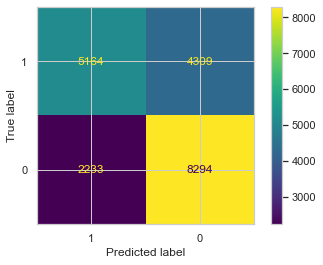

In [213]:
plot_confusion_matrix(rfecv_gb, rfecv.transform(X_test), y_test, labels=[1,0])

In [214]:
#auc:
rfecv_gb_y_predict_scores = rfecv_gb.predict_proba(rfecv.transform(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfecv_gb_y_predict_scores[:,1])
rfecv_gb_auc = auc(fpr, tpr)
print("AUC = ",rfecv_gb_auc)

AUC =  0.7333198418636094


In [215]:
print("Gini = ",2*rfecv_gb_auc-1)

Gini =  0.46663968372721887


### + SVM:

In [222]:
%%time
rfecv_svm = SVC()
rfecv_svm.fit(rfecv_X_train, y_train)

rfecv_svm_y_predict = rfecv_svm.predict(rfecv_X_test)

Wall time: 28min 40s


In [223]:
rfecv_svm_y_predict

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [224]:
print(classification_report(y_test, rfecv_svm_y_predict, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.68      0.80      0.73     10527
     class 1       0.72      0.58      0.64      9473

    accuracy                           0.69     20000
   macro avg       0.70      0.69      0.69     20000
weighted avg       0.70      0.69      0.69     20000



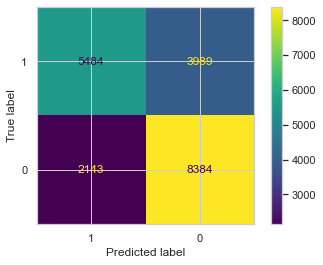

In [225]:
plot_confusion_matrix(rfecv_svm, rfecv_X_test, y_test, labels=[1,0])

In [226]:
#auc:
rfecv_svm_y_predict_scores = rfecv_svm.decision_function(rfecv_X_test)
fpr, tpr, thresholds = roc_curve(y_test, rfecv_svm_y_predict_scores)
rfecv_svm_auc = auc(fpr, tpr)
print("AUC = ",rfecv_svm_auc)

AUC =  0.7570968876150043


In [227]:
#gini:
print("gini = ", 2*rfecv_svm_auc-1)

gini =  0.5141937752300085


### + XGBoost:

In [216]:
rfecv_xgb = XGBClassifier(n_estimators=100)
rfecv_xgb.fit(rfecv.transform(X_train), y_train)

rfecv_xgb_y_predict = rfecv_xgb.predict(rfecv.transform(X_test))

[20:58:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [217]:
rfecv_xgb_y_predict

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [218]:
print(classification_report(y_test, rfecv_xgb_y_predict, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.69      0.77      0.73     10527
     class 1       0.71      0.61      0.66      9473

    accuracy                           0.70     20000
   macro avg       0.70      0.69      0.69     20000
weighted avg       0.70      0.70      0.69     20000



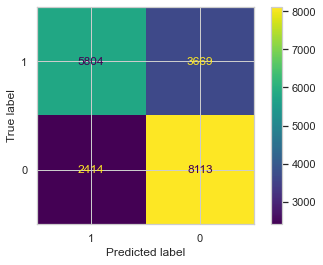

In [219]:
plot_confusion_matrix(rfecv_xgb, rfecv.transform(X_test), y_test, labels=[1,0])

In [220]:
#auc:
rfecv_xgb_y_predict_scores = rfecv_xgb.predict_proba(rfecv.transform(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfecv_xgb_y_predict_scores[:,1])
rfecv_xgb_auc = auc(fpr, tpr)
print("AUC = ",rfecv_xgb_auc)

AUC =  0.7627307845807081


In [221]:
print("Gini = ", 2*rfecv_xgb_auc-1)

Gini =  0.5254615691614162


### => Ranking models using GINI:

1. XGBOOST 
2. SVM 
3. RANDOM FOREST 
4. GRADIENT BOOSTING 
5. LOGISTIC REGRESSION 
6. DECISION TREE 
7. NAIVE BAYES 

► In general, the perfomances of the models with RFE are better than that without feature-selection.

## - Short conclusion for feature selection:

In [231]:
num_features_fs = {
    'None' : [len(X_train.columns)],
    'PCA' : [pca.n_components_],
    'SKB' : [count],
    'RFE' : [rfecv.n_features_]
}
num_features_fs_df = pd.DataFrame(num_features_fs,index=['Num of features'])
num_features_fs_df

,None,PCA,SKB,RFE
Num of features,378,96,125,138


► PCA reduces **the most** number of features.

In [229]:
#define a function to convert AUC into GINI:
def auc_into_gini(x):
    return round((2*x-1)*100, 2)

#Create a dictionary for models and AUC:
models = {
    'Naive Bayes' : [nb_auc, pca_NB_auc, skb_nb_auc, rfecv_nb_auc],
    'Logistic regression' : [lr_auc, pca_lr_auc, skb_lr_auc, rfecv_lr_auc],
    'Decision tree' : [dt_auc, pca_dt_auc, skb_dt_auc, rfecv_dt_auc],
    'Random forest' : [rf_auc, pca_rf_auc, skb_rf_auc, rfecv_rf_auc],
    'Gradient boosting' : [gb_auc, pca_gb_auc, skb_gb_auc, rfecv_gb_auc],
    'SVM' : [None, pca_svm_auc, skb_svm_auc, rfecv_svm_auc],
    'XGBoost' : [xgb_auc, pca_xgb_auc, skb_xgb_auc, rfecv_xgb_auc]
}

#Convert dictionary into a dataframe:
models_df = pd.DataFrame(models, index=['None','PCA','SKB','RFE'])

#Convert AUC into GINI:
for i in models_df.columns:
    models_df[i] = models_df[i].apply(lambda x: auc_into_gini(x))

In [230]:
models_df

,Naive Bayes,Logistic regression,Decision tree,Random forest,Gradient boosting,SVM,XGBoost
None,16.66,46.71,21.60,49.02,46.53,NaN,51.84
PCA,26.81,44.47,18.74,45.16,46.34,51.05,49.49
SKB,21.62,44.10,19.82,47.07,45.63,49.44,50.84
RFE,22.00,45.43,21.73,49.32,46.66,51.42,52.55


► **Naive bayes** and **decision tree** have **bad** performances, so we **won't use** these models to deploy or implement.

► **XGBoost** and **SVM** are the **best** models. However, **SVM** takes **a lot of time** to training and predicting so we **won't use** this model.

► **XGBoost** with **RFE** has the best performance.

=> **We will use XGBoost with RFE to deploy in a project.**

# Tuning models:

► We will tuning for XGBoost with RFE:

- **First time tuning**:

In [246]:
first_params = {
    'n_estimators' : [100, 200, 300],
    'learning_rate' : [0.06, 0.08, 0.1],
    'reg_lambda' : [1, 3, 5],
    'max_depth': [6, 8 ,10]
}

In [247]:
clf =  GridSearchCV(XGBClassifier(verbosity = 0), first_params, return_train_score=False)
clf.fit(rfecv.transform(X_train), y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [248]:
clf.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300, 'reg_lambda': 5}

In [249]:
first_tuned_xgb = XGBClassifier(n_estimators = 300, learning_rate = 0.1, reg_lambda = 5, max_depth = 10)
first_tuned_xgb.fit(rfecv.transform(X_train), y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=5, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [250]:
first_tuned_xgb_y_predict_scores = first_tuned_xgb.predict_proba(rfecv.transform(X_test))
fpr, tpr, thresholds = roc_curve(y_test, first_tuned_xgb_y_predict_scores[:,1])
first_tuned_xgb_auc = auc(fpr, tpr)
print("AUC = ",first_tuned_xgb_auc)

AUC =  0.7691161686440133


In [251]:
print("gini = ", 2*first_tuned_xgb_auc-1)

gini =  0.5382323372880267


- **Second time tuning**:

In [299]:
second_params = {
    'n_estimators' : [300, 400, 500],
    'learning_rate' : [0.1, 0.12, 0.14],
    'max_depth': [10, 12, 14]
}

In [300]:
clf =  GridSearchCV(XGBClassifier(verbosity = 0, reg_lambda = 5), second_params, return_train_score=False)
clf.fit(rfecv.transform(X_train), y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=5,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=N

In [301]:
clf.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}

In [321]:
second_tuned_xgb = XGBClassifier(n_estimators = 300, learning_rate = 0.1, reg_lambda = 5, max_depth = 10)      
second_tuned_xgb.fit(rfecv.transform(X_train), y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=5, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [322]:
second_tuned_xgb_y_predict_scores = second_tuned_xgb.predict_proba(rfecv.transform(X_test))
fpr, tpr, thresholds = roc_curve(y_test, second_tuned_xgb_y_predict_scores[:,1])
second_tuned_xgb_auc = auc(fpr, tpr)
print("AUC = ",second_tuned_xgb_auc)

AUC =  0.7691161686440133


In [323]:
print("Gini = ", 2*second_tuned_xgb_auc-1)

Gini =  0.5382323372880267


#### => Caculate the gini of **training set**:

In [332]:
second_tuned_xgb_y_train_predict_scores = second_tuned_xgb.predict_proba(rfecv.transform(X_train))
fpr, tpr, thresholds = roc_curve(y_train, second_tuned_xgb_y_train_predict_scores[:,1])
second_tuned_xgb_auc_train = auc(fpr, tpr)
print("Gini of training set = ",2*second_tuned_xgb_auc_train-1)

Gini of training set =  0.8777180171364578


► As we can see, the model has an **overfitting**. The gini of training set is **87,77%**, meanwhile the gini of testing set is just **53.82%**

So, we need to **adjust** the model in order to **reduce the overfitting-rate**.

reg_lambda = 200

In [353]:
overfitting_tuned_xgb = XGBClassifier(n_estimators = 300, learning_rate = 0.1, reg_lambda = 200, max_depth = 10)
overfitting_tuned_xgb.fit(rfecv.transform(X_train), y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=200, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [356]:
overfitting_tuned_xgb_y_train_predict_scores = overfitting_tuned_xgb.predict_proba(rfecv.transform(X_train))
fpr, tpr, thresholds = roc_curve(y_train, overfitting_tuned_xgb_y_train_predict_scores[:,1])
overfitting_tuned_xgb_auc_train = auc(fpr, tpr)
print("Gini of training set = ",2*overfitting_tuned_xgb_auc_train-1)

Gini of training set =  0.6527116088992191


In [357]:
overfitting_tuned_xgb_y_test_predict_scores = overfitting_tuned_xgb.predict_proba(rfecv.transform(X_test))
fpr, tpr, thresholds = roc_curve(y_test, overfitting_tuned_xgb_y_test_predict_scores[:,1])
overfitting_tuned_xgb_auc_test = auc(fpr, tpr)
print("Gini of testing set = ",2*overfitting_tuned_xgb_auc_test-1)

Gini of testing set =  0.5338468073997231
